# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
df = pd.read_csv('../data/breast_cancer_wisconsin.csv')
df.sample(5)

,ID,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
424,1257938,3,1,1,1,2,1,1,1,1,2
262,274137,8,8,9,4,5,10,7,8,1,4
516,1320077,1,1,1,1,1,1,1,1,1,2
129,1177512,1,1,1,1,10,1,1,1,1,2
413,1238915,5,1,2,1,2,1,3,1,1,2


In [3]:
#check for nulls in the data
df.isnull().sum()

ID                             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [4]:
#check for na in the data
df.isna().sum()

ID                             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

There are no nulls/missing values

In [5]:
#check for duplicates in the data
df.duplicated().sum()

8

In [6]:
#drop duplicates
df.drop_duplicates(keep='first', inplace=True)

#describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,691.0,1.073333e+06,619295.297098,61634.0,872549.0,1171710.0,1238437.0,13454352.0
clump_thickness,691.0,4.426918e+00,2.815861,1.0,2.0,4.0,6.0,10.0
uniformity_of_cell_size,691.0,3.130246e+00,3.041328,1.0,1.0,1.0,5.0,10.0
uniformity_of_cell_shape,691.0,3.201158e+00,2.959886,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,691.0,2.824891e+00,2.866552,1.0,1.0,1.0,4.0,10.0
single_epithelial_cell_size,691.0,3.211288e+00,2.199852,1.0,2.0,2.0,4.0,10.0
bland_chromatin,691.0,3.435601e+00,2.442345,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,691.0,2.882779e+00,3.066298,1.0,1.0,1.0,4.0,10.0
mitoses,691.0,1.593343e+00,1.723129,1.0,1.0,1.0,1.0,10.0
class,691.0,2.688857e+00,0.951051,2.0,2.0,2.0,4.0,4.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           691 non-null    int64 
 1   clump_thickness              691 non-null    int64 
 2   uniformity_of_cell_size      691 non-null    int64 
 3   uniformity_of_cell_shape     691 non-null    int64 
 4   marginal_adhesion            691 non-null    int64 
 5   single_epithelial_cell_size  691 non-null    int64 
 6   bare_nuclei                  691 non-null    object
 7   bland_chromatin              691 non-null    int64 
 8   normal_nucleoli              691 non-null    int64 
 9   mitoses                      691 non-null    int64 
 10  class                        691 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.8+ KB


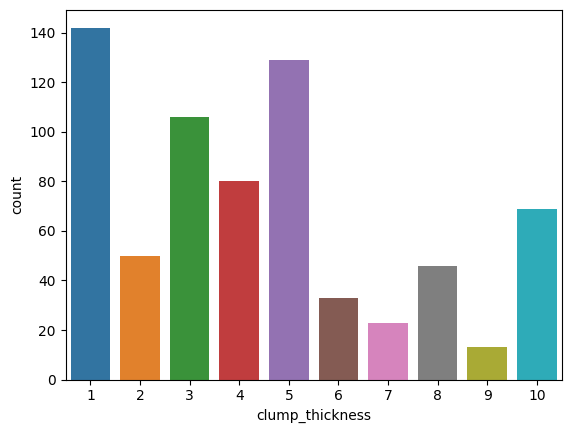

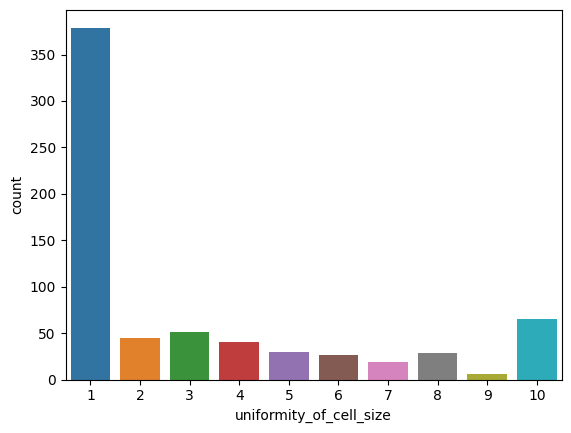

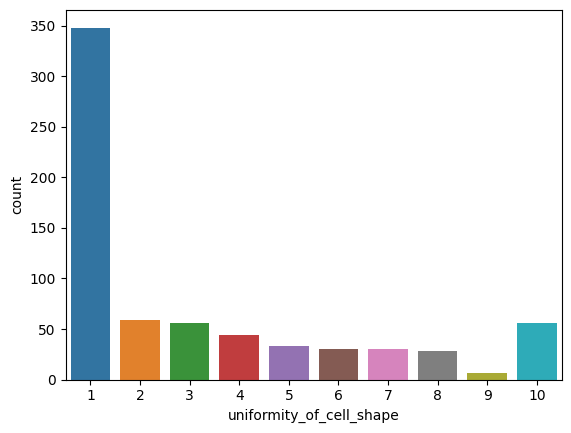

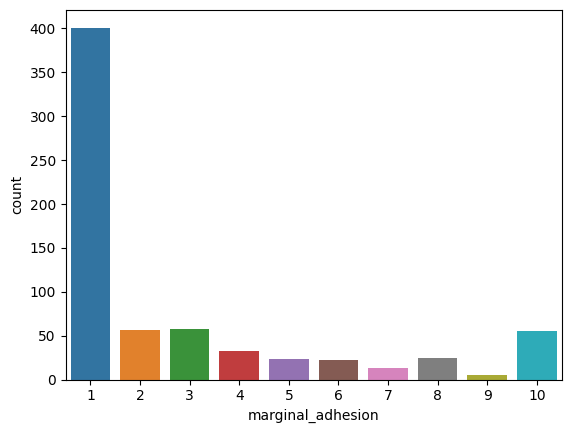

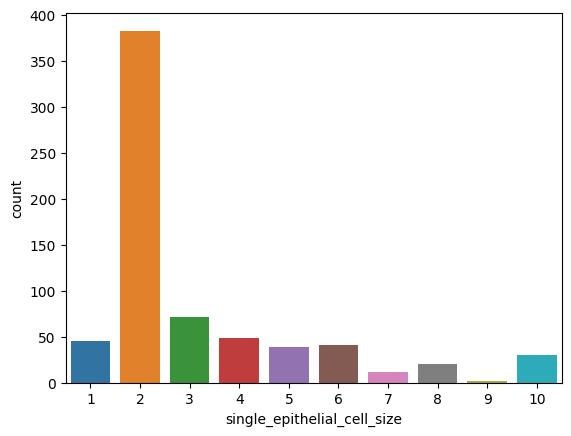

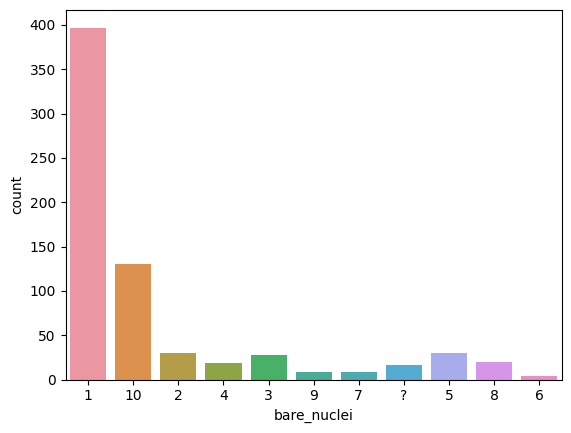

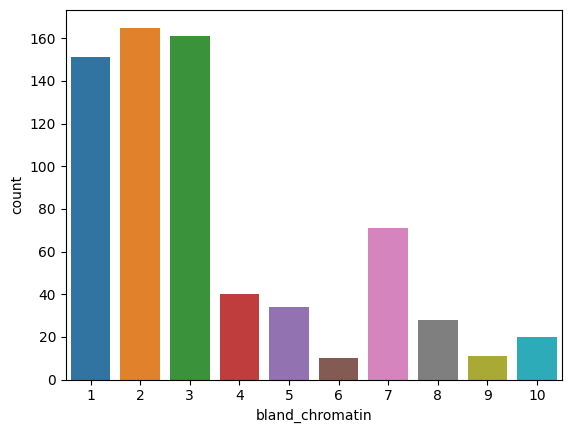

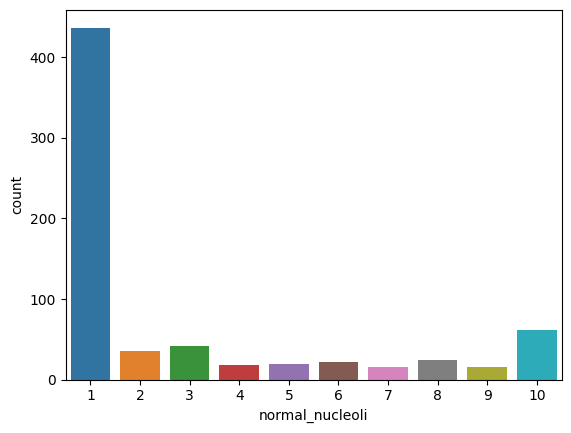

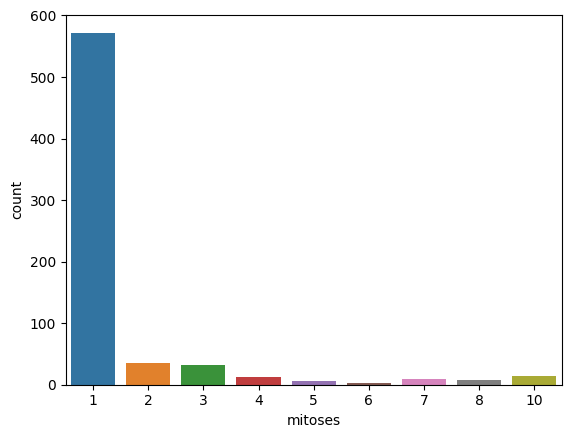

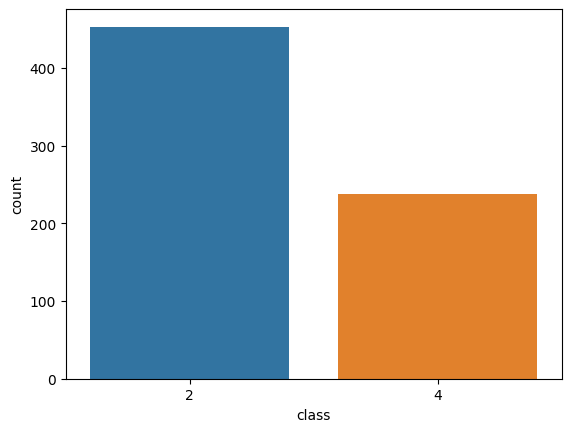

In [8]:
#function for count plot of one column
def count_plot(data, column):
    sns.countplot(x=column, data=data)
    plt.show()

#drop ID column
df_no_ID = df.drop('ID', axis=1).copy()

#for loop to plot count plot for each column
for column in df_no_ID.columns:
    count_plot(df_no_ID, column)    

In [9]:
df_no_ID['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [10]:
#replace a value
df_no_ID['bare_nuclei'] = df_no_ID['bare_nuclei'].replace('?', 0)

#convert to int
df_no_ID['bare_nuclei'] = df_no_ID['bare_nuclei'].astype(int)

#note the spread of the classes
df_no_ID['class'].value_counts(normalize=True)

2    0.655572
4    0.344428
Name: class, dtype: float64

In [11]:
#splitting the data as independent and dependent variables
X = df_no_ID.drop('class', axis=1)
y = df_no_ID['class']

#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

y_train.value_counts(normalize=True)

2    0.656315
4    0.343685
Name: class, dtype: float64

In [12]:
y_train.value_counts(normalize=True)

2    0.656315
4    0.343685
Name: class, dtype: float64

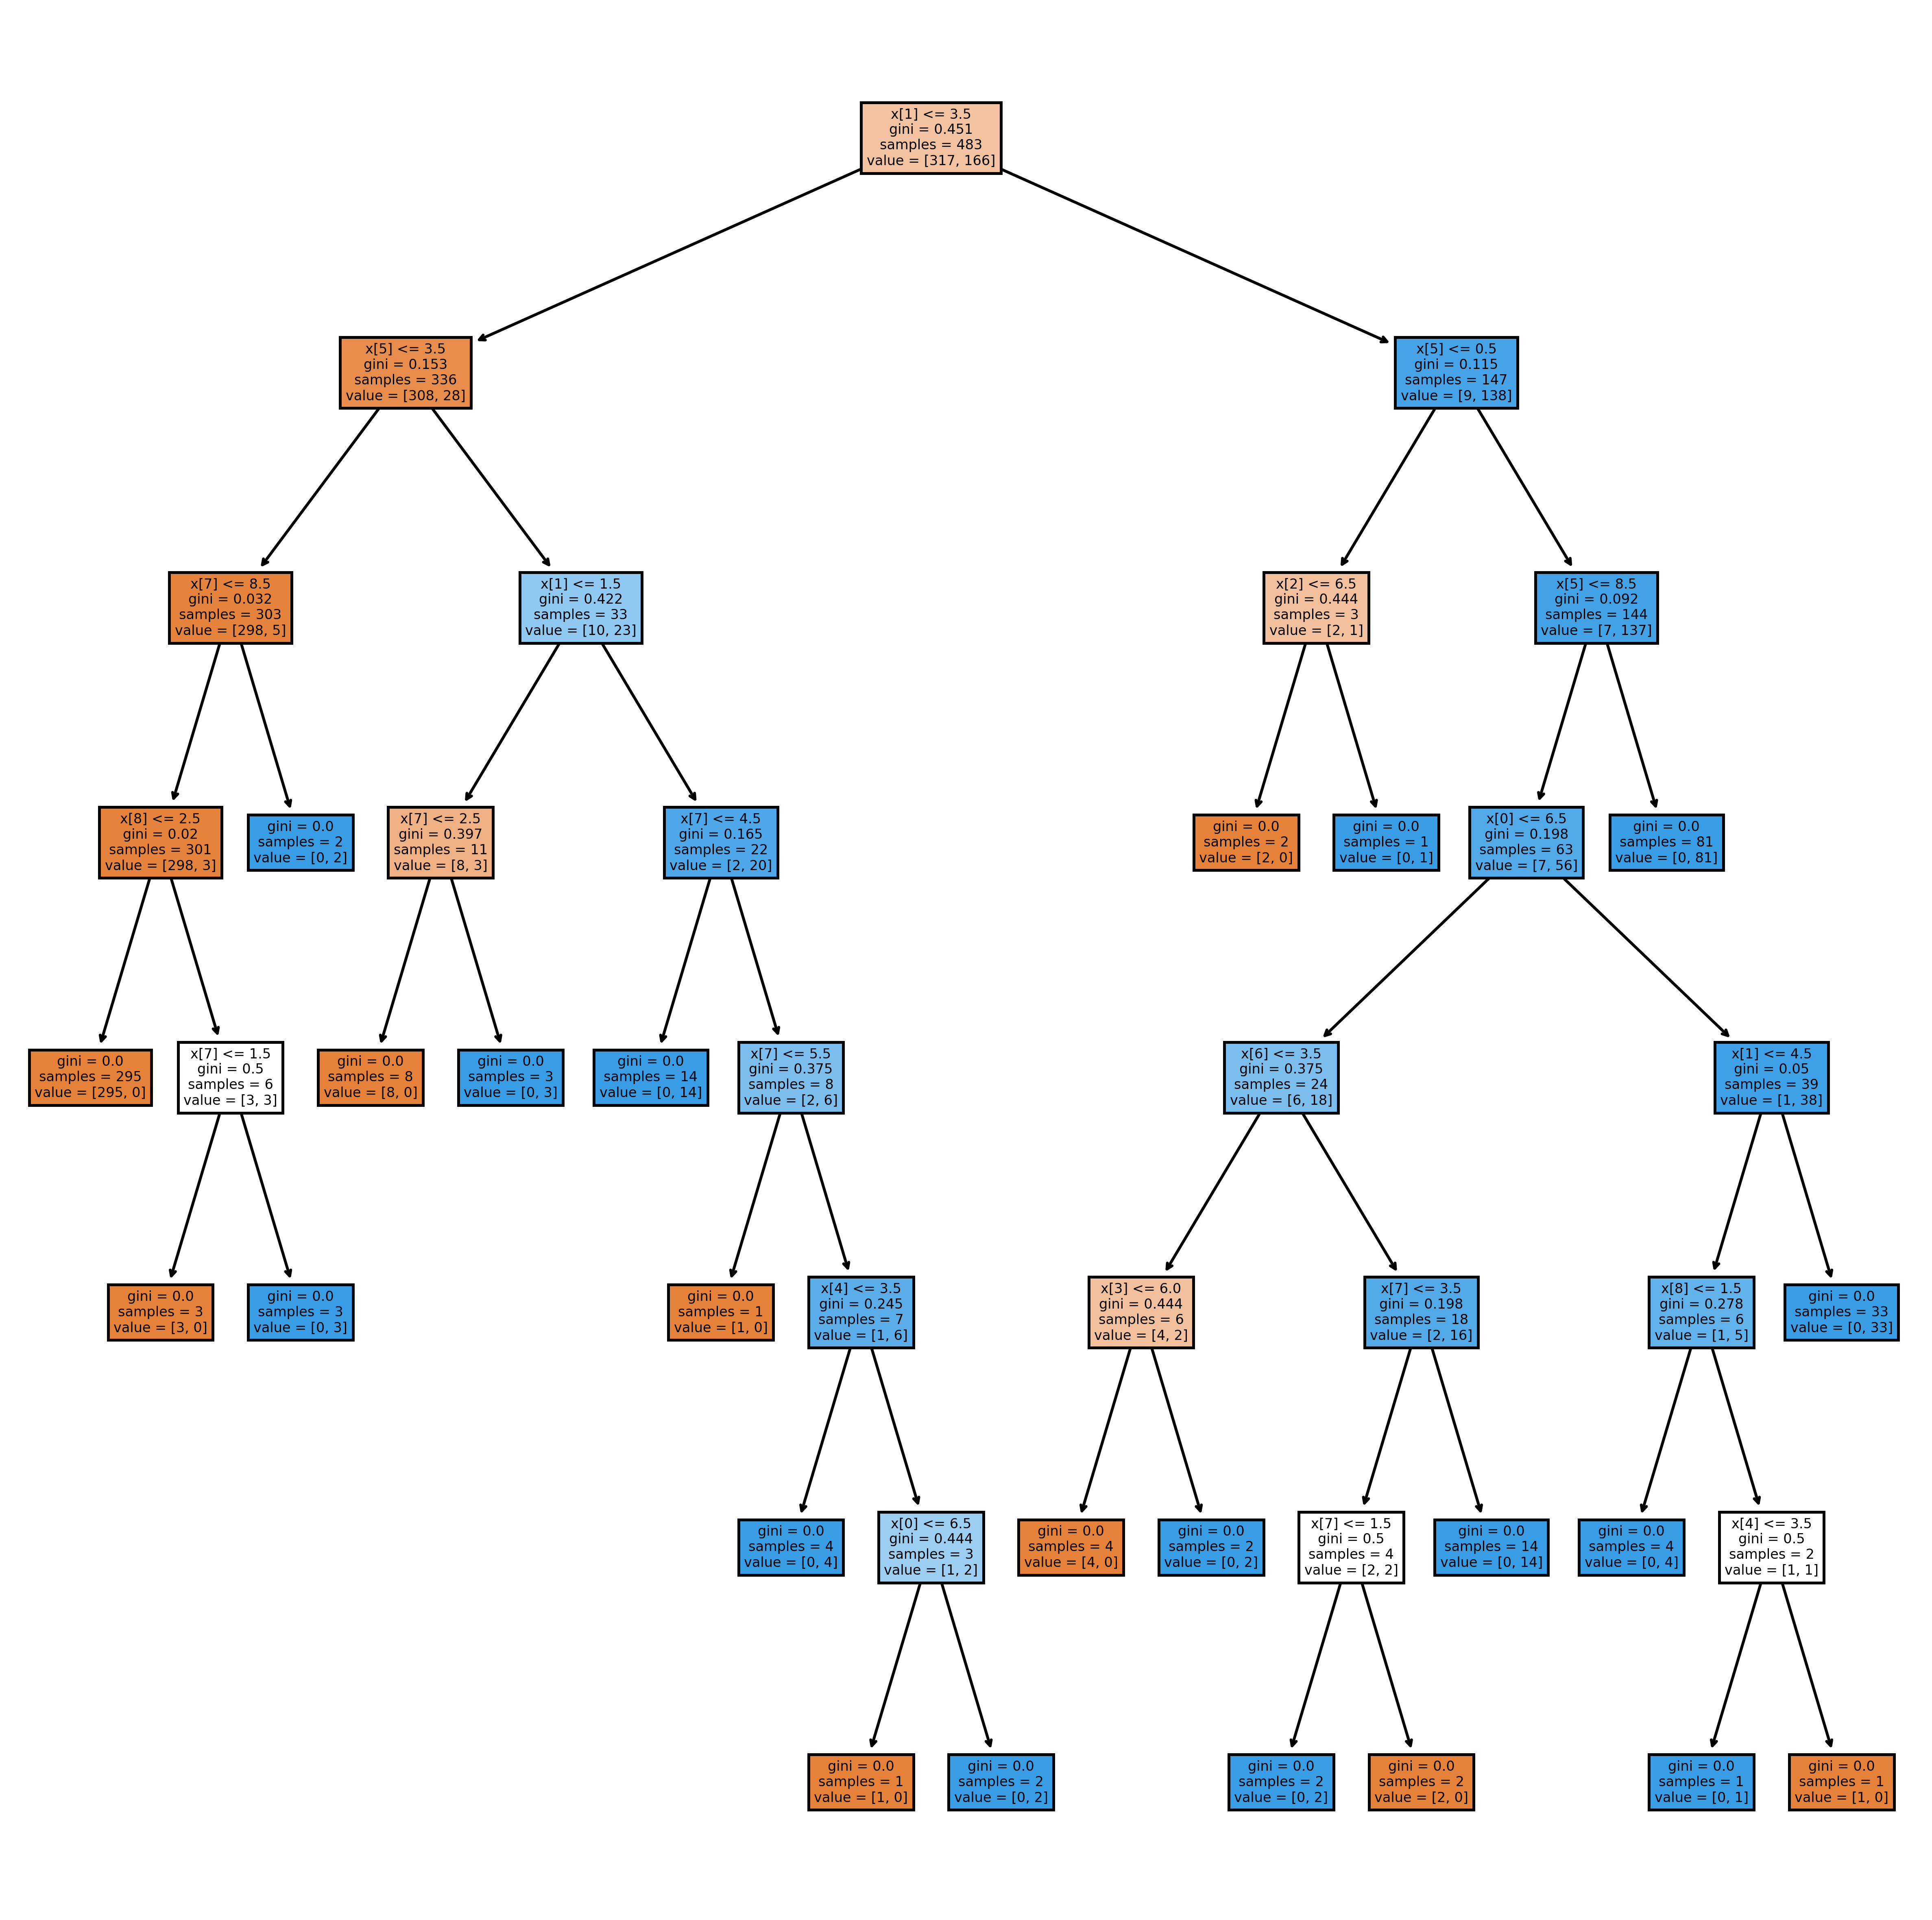

In [13]:
#Decision Tree
#create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

#fit data to model
dtc.fit(X_train, y_train)

#import libraries to plot the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#plot the decision tree
plt.figure(figsize=(12, 12), dpi=500)
plot_tree(dtc, filled=True)
plt.show()

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       317
           4       1.00      1.00      1.00       166

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



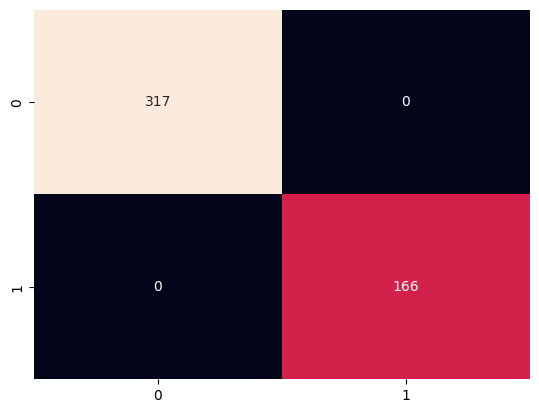

------------------------------------------------------
              precision    recall  f1-score   support

           2       0.94      0.96      0.95       136
           4       0.93      0.88      0.90        72

    accuracy                           0.93       208
   macro avg       0.93      0.92      0.92       208
weighted avg       0.93      0.93      0.93       208



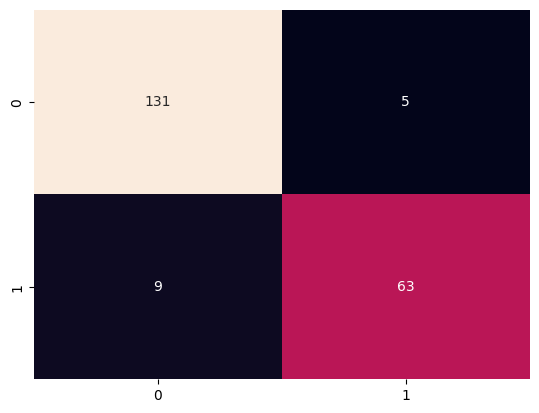

In [14]:
#import libraries to evaulate the model
from sklearn.metrics import classification_report, confusion_matrix

#evaluate the model
ytrain_pred = dtc.predict(X_train)

#evaluate the model
print(classification_report(y_train, ytrain_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_train, ytrain_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()

print("------------------------------------------------------")

#evaluate the model
ytest_pred = dtc.predict(X_test)

#evaluate the model
print(classification_report(y_test, ytest_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_test, ytest_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt="d")
plt.show()

In [15]:
#import grid search
from sklearn.model_selection import GridSearchCV

#grid search for hyperparameter tuning on decision tree
param_grid = {'max_depth': np.arange(4,7),
              'min_samples_split': [5,7],
              'min_samples_leaf': [10],
              'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_leaf_nodes': [10,12,16],
              'min_impurity_decrease': np.arange(0, 10),
              'min_impurity_split': np.arange(0, 10),
              'bootstrap': [True, False],
              'oob_score': [True, False],
              'ccp_alpha': np.arange(0, 10)}

#initialize the grid search object
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='roc_auc',verbose=1, n_jobs=-1)

#fit the data to the grid search object
grid_search.fit(X_train, y_train)

#print the best parameters
print(grid_search.best_params_)

#best parameters
best_model = grid_search.best_estimator_

: 

In [ ]:
#import libraries to evaulate the model
from sklearn.metrics import roc_curve, roc_auc_score

#evaluate the model
ytrain_pred = best_model.predict(X_train)

#evaluate the model usinf roc_curve and roc_auc_score on train data
fpr, tpr, thresholds = roc_curve(y_train, ytrain_pred)
roc_auc = roc_auc_score(y_train, ytrain_pred)

#plot the roc curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("------------------------------------------------------")

#evaluate the model
ytest_pred = best_model.predict(X_test)

#evaluate the model usinf roc_curve and roc_auc_score on test data
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred)
roc_auc = roc_auc_score(y_test, ytest_pred)

#plot the roc curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()